In [2]:
### We can detect models that overfit by looking at the differences between the error made on the train and the test sets.
### The error on the test set is an estimation of the generalization error.

In [3]:
import pandas as pd

data_df = pd.read_csv("c3_electric-cars.csv")

data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In [4]:
# start by creating a list with all the indexes that we can then split into two

import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)

print("indexes:", indexes)

indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In [5]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print("train indexes:", train_idx)
print("test indexes:", test_idx)

train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


In [6]:
# create test and train values from new split list

# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

print("train:", x_tr.shape, y_tr.shape)
print("test:", x_te.shape, y_te.shape)

train: (39,) (39,)
test: (18,) (18,)


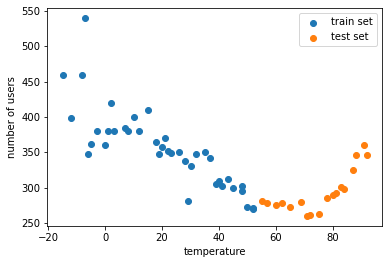

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("number of users")
plt.legend()
plt.show()

In [8]:
# issue is that temps organised in initial dataset so need to shuffle pre split 

# shuffle the indexes
np.random.shuffle(indexes)

print("indexes:", indexes)  # result depends on the seed

indexes: [18 37 26 53 13 50 22 33 20 47 39 29 52 44  5 11  1 49 14  7  9 38 12 43
 54 31 24 19 41  3 34 15 21  2 51 27 25 23 48 35 17  4 40 28 36 46 42  8
 32 45 56 30  6 10 16  0 55]


In [9]:
# fix results of random shuffle using seed() function

# Create the indexes
indexes = np.arange(n)

# Shuffle the indexes
np.random.seed(0)
np.random.shuffle(indexes)

print("indexes:", indexes)

indexes: [35 34 41 27 11  2 33 56 22 55  4 10 29 50 32 40 37  7 14 31 28 46 51 18
 54 26 15  5 30 16 48 20 49  8 13 25 17 42 45 38  1 12 43 24  6 23 36 21
 19  9 39 52  3  0 53 47 44]


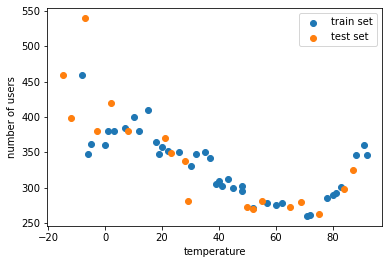

In [11]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("number of users")
plt.legend()
plt.show()

In [12]:
# scikit has built in function for test split data

from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)

In [13]:
# alternatively can express number of points rather than %

from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=39, test_size=18, random_state=0
)

In [14]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print(
    "Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred5_tr), mse(y_te, y_pred5_te)
    )
)
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print(
    "Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred10_tr), mse(y_te, y_pred10_te)
    )
)

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)


We can see that the polynomial of degree 10 has a better training error than the polynomial of degree 5. However, its test score nearly doubles which means that it’s likely overfitting. On the other hand, the polynomial of degree 5 seems to generalize well from the data with a test score close to its train score.